In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Avg Number of stops

In [38]:
l_nstops = pd.read_csv('gen/l_nstops.csv')

In [39]:
l_nstops = l_nstops.set_index('Route')

In [40]:
d_nstops = pd.read_csv('gen/hk_nstops.csv')

In [41]:
d_nstops = d_nstops.set_index('route_id')

In [42]:
d_nstops['City'] = 'Hong Kong'

In [43]:
l_nstops['City'] = 'London'

In [44]:
d_nstops.rename(columns={'stop_id': 'Stops'}, inplace=True)

In [45]:
l_nstops.rename(columns={'Stop_Code_LBSL': 'Stops'}, inplace=True)

In [46]:
nstops = pd.merge(d_nstops, l_nstops, on='City', how='outer')
nstops

,Stops_x,City,Stops_y
0,25.0,Hong Kong,NaN
1,48.0,Hong Kong,NaN
2,26.0,Hong Kong,NaN
3,36.0,Hong Kong,NaN
4,41.0,Hong Kong,NaN
...,...,...,...
2749,NaN,London,73.0
2750,NaN,London,37.0
2751,NaN,London,26.0
2752,NaN,London,28.0


In [47]:
nstops.shape

(2754, 3)

In [48]:
d_nstops.shape[0]

1981

In [49]:
l_nstops.shape[0]

773

In [50]:
d_nstops.shape[0] + l_nstops.shape[0]

2754

In [51]:
cols = ['Stops_x', 'Stops_y']
nstops = nstops.assign(value=nstops[cols].sum(1)).drop(labels=cols, axis=1)

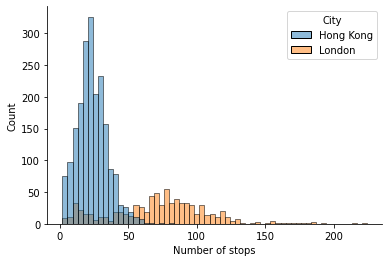

In [52]:
_, ax = plt.subplots()
sns.histplot(data=nstops, ax=ax, x='value', hue='City')
sns.despine()
plt.xlabel('Number of stops')
plt.savefig('figures/nstops.png')

Text(0.5, 0, 'Number of stops')

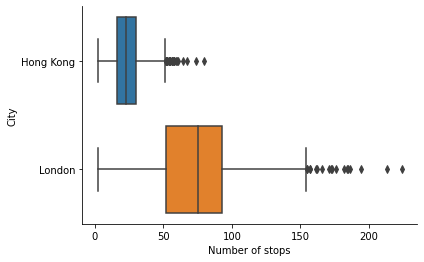

In [53]:
_, ax = plt.subplots()
sns.boxplot(data=nstops, ax=ax, x='value', y='City')
sns.despine()
plt.xlabel('Number of stops')
#plt.savefig('figures/nstops.png')

# Route lengths

In [54]:
l_rlengths = pd.read_csv('gen/l_rlengths.csv')

In [55]:
d_rlengths = pd.read_csv('gen/hk_rlengths.csv')

In [56]:
d_rlengths['City'] = 'Hong Kong'

In [57]:
l_rlengths['City'] = 'London'

In [58]:
d_rlengths.rename(columns={'0': 'Length'}, inplace=True)

In [59]:
l_rlengths.rename(columns={'0': 'Length'}, inplace=True)

In [60]:
lengths = pd.merge(d_rlengths[['City', 'Length']], l_rlengths[['City', 'Length']], on='City', how='outer')
lengths

,City,Length_x,Length_y
0,Hong Kong,8640.700522,NaN
1,Hong Kong,8916.991116,NaN
2,Hong Kong,17567.351697,NaN
3,Hong Kong,13866.262750,NaN
4,Hong Kong,13553.527218,NaN
...,...,...,...
3645,London,NaN,14821.371159
3646,London,NaN,30937.166032
3647,London,NaN,31094.572755
3648,London,NaN,17299.840987


In [61]:
lengths.shape

(3650, 3)

In [62]:
d_rlengths.shape[0] + l_rlengths.shape[0]

3650

In [63]:
cols = ['Length_x', 'Length_y']
lengths = lengths.assign(value=lengths[cols].sum(1)).drop(labels=cols, axis=1)

In [64]:
lengths['value'] = lengths.value / 1000

In [65]:
d_rlengths.Length.mean()

18031.303450460367

In [66]:
d_rlengths.Length.median()

15525.663512962012

In [67]:
l_rlengths.Length.mean()

11853.769624649534

In [68]:
l_rlengths.Length.median()

11462.78139141907

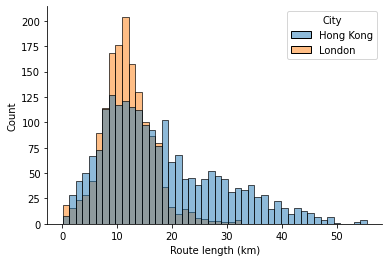

In [69]:
_, ax = plt.subplots()
sns.histplot(data=lengths, ax=ax, x='value', hue='City')
sns.despine()
plt.xlabel('Route length (km)')
plt.savefig('figures/rlengths.png')

Text(0.5, 0, 'Route length (km)')

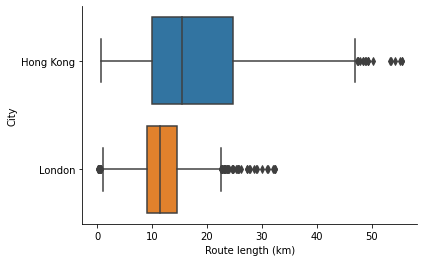

In [70]:
_, ax = plt.subplots()
sns.boxplot(data=lengths, ax=ax, x='value', y='City')
sns.despine()
plt.xlabel('Route length (km)')
#plt.savefig('figures/rlengths.png')

# number of stops in route vs route length

In [71]:
hk_merged = d_nstops.reset_index().merge(d_rlengths, on='route_id')
hk_merged

,route_id,Stops,City_x,Length,City_y
0,1001,25,Hong Kong,8640.700522,Hong Kong
1,1001,25,Hong Kong,8916.991116,Hong Kong
2,1002,48,Hong Kong,17567.351697,Hong Kong
3,1006,26,Hong Kong,13866.262750,Hong Kong
4,1006,26,Hong Kong,13553.527218,Hong Kong
...,...,...,...,...,...
3184,1000209,28,Hong Kong,29900.782583,Hong Kong
3185,1000209,29,Hong Kong,29479.526566,Hong Kong
3186,1000209,29,Hong Kong,29900.782583,Hong Kong
3187,1000210,19,Hong Kong,36974.009651,Hong Kong


In [72]:
l_merged = l_nstops.reset_index().merge(l_rlengths, on='Route')
l_merged

,Route,Stops,City_x,Run,Length,City_y
0,1,56,London,1,8247.834640,London
1,1,56,London,2,8552.044646,London
2,100,46,London,1,5753.782624,London
3,100,46,London,2,5209.819719,London
4,101,86,London,1,10804.467542,London
...,...,...,...,...,...,...
1542,X140,26,London,2,14821.371159,London
1543,X26,28,London,1,30937.166032,London
1544,X26,28,London,2,31094.572755,London
1545,X68,69,London,1,17299.840987,London


In [73]:
merged = pd.concat([
    hk_merged[['Stops', 'Length', 'City_x']],
    l_merged[['Stops', 'Length', 'City_x']]
], ignore_index=True)

In [74]:
merged.rename(columns={'City_x': 'City'}, inplace=True)

In [75]:
merged['Length'] = merged['Length'] / 1000

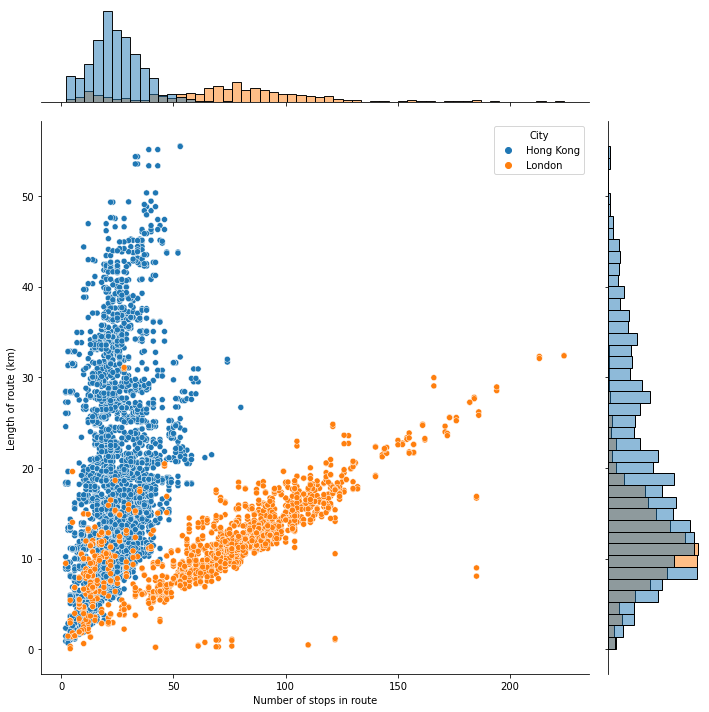

In [76]:
g = sns.JointGrid(data=merged, x='Stops', y='Length', hue='City', height=10)
g.plot(sns.scatterplot, sns.histplot)
#for _,gr in merged.groupby('City'):
#    sns.regplot(x='Stops', y='Length', data=gr, scatter=False, ax=g.ax_joint, truncate=False)
g.set_axis_labels('Number of stops in route', 'Length of route (km)')
plt.savefig('figures/route_nstops_len.png')

<AxesSubplot:xlabel='Stops', ylabel='Length'>

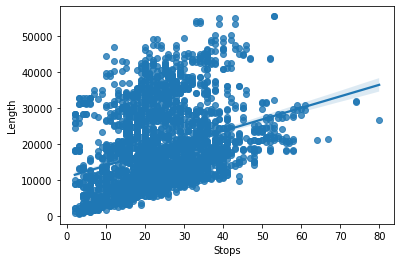

In [41]:
sns.regplot(data=hk_merged, x='Stops', y='Length')

## validation

In [80]:
# https://tfl.gov.uk/bus/route/n199/
# night buses have hundreds of stops
l_merged.sort_values('Stops', ascending=False)

,Route,Stops,City_x,Run,Length,City_y
1186,N199,224,London,1,32406.206615,London
1187,N199,224,London,2,32374.462137,London
1271,N89,213,London,2,32082.524668,London
1270,N89,213,London,1,32306.152415,London
1253,N68,194,London,2,28940.387658,London
...,...,...,...,...,...,...
869,631,4,London,1,322.851359,London
870,631,4,London,2,77.884530,London
1493,UL82,4,London,1,5417.517605,London
1372,UL22,3,London,1,1461.610413,London


In [84]:
# https://tfl.gov.uk/bus/route/X26
# Going to heathrow (route length = long), but doesn't have a lot of stops
l_merged[(l_merged['Length'] > 30000) & (l_merged['Stops'] < 50)]

,Route,Stops,City_x,Run,Length,City_y
1543,X26,28,London,1,30937.166032,London
1544,X26,28,London,2,31094.572755,London


In [85]:
# https://tfl.gov.uk/bus/route/108
# it's bending around like a spiral, but not really going anywhere
l_merged[(l_merged['Length'] < 5000) & (l_merged['Stops'] > 50)]

,Route,Stops,City_x,Run,Length,City_y
20,108,122,London,3,1068.375610,London
21,108,122,London,4,1201.170333,London
558,357,61,London,3,444.918955,London
559,357,61,London,4,365.465457,London
652,406,70,London,3,1025.358710,London
653,406,70,London,4,285.271800,London
736,467,69,London,3,1025.358710,London
737,467,69,London,4,285.271800,London
889,642,64,London,3,769.552204,London
1096,E7,76,London,3,1112.441198,London


# Distance between stops

In [2]:
l_dist_b_stops = pd.read_csv('gen/l_stop_dists.csv')
l_dist_b_stops

,Route,Run,0
0,1,1,305.475357
1,1,2,316.742394
2,100,1,250.164462
3,100,2,248.086653
4,101,1,251.266687
...,...,...,...
1542,X140,2,1235.114263
1543,X26,1,2379.782002
1544,X26,2,2391.890212
1545,X68,1,540.620031


In [3]:
l_dist_b_stops.rename(columns={'0': 'distance'}, inplace=True)

In [4]:
l_dist_b_stops = l_dist_b_stops.groupby('Route')['distance'].mean()
l_dist_b_stops

Route
1        311.108876
100      249.125558
101      255.559471
102      301.624556
103      305.706899
           ...     
W8       265.991724
W9       468.689957
X140    1238.420828
X26     2385.836107
X68      521.354650
Name: distance, Length: 771, dtype: float64

In [5]:
l_dist_b_stops = pd.DataFrame(l_dist_b_stops)

In [6]:
l_dist_b_stops['City'] = 'London'

In [7]:
hk_dist_b_stops = pd.read_csv('gen/hk_stop_dists.csv')
hk_dist_b_stops

,route_id,distance
0,1001,364.932494
1,1002,373.773440
2,1006,547.914668
3,1008,446.814018
4,1010,406.577768
...,...,...
1433,1000207,1085.143987
1434,1000208,4496.741284
1435,1000209,1079.859705
1436,1000210,2047.796860


In [8]:
hk_dist_b_stops.rename(columns={'0': 'distance'}, inplace=True)

In [9]:
hk_dist_b_stops['City'] = 'Hong Kong'

In [10]:
dist_b_stops = pd.concat(
    [l_dist_b_stops[['distance', 'City']], hk_dist_b_stops[['distance', 'City']]],
    ignore_index=True
)
dist_b_stops

,distance,City
0,311.108876,London
1,249.125558,London
2,255.559471,London
3,301.624556,London
4,305.706899,London
...,...,...
2204,1085.143987,Hong Kong
2205,4496.741284,Hong Kong
2206,1079.859705,Hong Kong
2207,2047.796860,Hong Kong


In [11]:
dist_b_stops.shape

(2209, 2)

In [12]:
l_dist_b_stops.shape[0] + hk_dist_b_stops.shape[0]

2209

Text(0.5, 0, 'Distance between stop (m)')

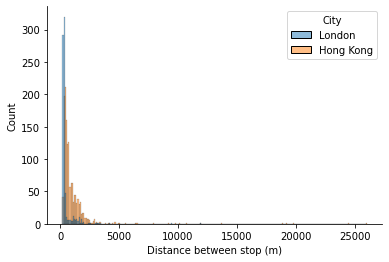

In [13]:
_, ax = plt.subplots()
sns.histplot(data=dist_b_stops, x='distance', hue='City', ax=ax)
sns.despine()
plt.xlabel('Distance between stop (m)')

In [14]:
dist_b_stops['distance'] = dist_b_stops['distance'] / 1000

Text(0.5, 0, 'Distance between stop (km)')

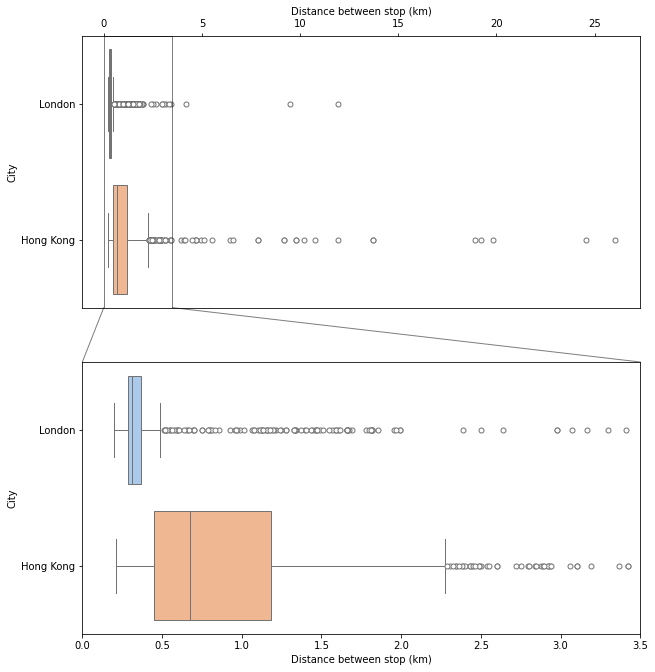

In [15]:
_, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=dist_b_stops, x='distance', y='City', ax=ax, palette='pastel', linewidth=1,
           flierprops=dict(markerfacecolor='white', marker='o'))

ax.set_xlabel('Distance between stop (km)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax2 = ax.inset_axes([0, -1.2, 1, 1])
sns.boxplot(data=dist_b_stops, x='distance', y='City', ax=ax2, palette='pastel', linewidth=1,
           flierprops=dict(markerfacecolor='white', marker='o'))
ax2.set_xlim((0, 3.5))

ax.indicate_inset_zoom(ax2, edgecolor="black")
ax2.set_xlabel('Distance between stop (km)')
# Use `python extract_fig.py` to generate figure instead
#plt.savefig('figures/distance_between_stops.png')

## validation

In [25]:
routes = pd.read_csv('data/hk/headway/routes.txt')

In [31]:
joined = hk_dist_b_stops.merge(routes, on='route_id')

In [36]:
# basically the longest routes are non-stop routes from mainland china to various places
# also one for the HK-macau-zhuhai bridge
# the longest non-border routes is from tai po to the airport
joined.sort_values('distance', ascending=False).head(20)

,route_id,distance,City,agency_id,route_short_name,route_long_name,route_type,route_url
809,8250,26036.886216,Hong Kong,XB,Mong Kok - Huanggang (Night),MONG KOK - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
671,1999,24562.061322,Hong Kong,XB,Disneyland - Huanggang,DISNEYLAND - HUANGGANG,3,https://www.hongkongdisneyland.com/guest-servi...
664,1991,19833.776696,Hong Kong,XB,Mong Kok - Huanggang (Day),MONG KOK - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
665,1992,19237.024592,Hong Kong,XB,Yau Tsim - Huanggang (Night),YAU TSIM - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
800,8239,18903.089833,Hong Kong,XB,Yau Tsim - Huanggang (Day),YAU TSIM - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
655,1973,13718.033038,Hong Kong,XB,Tsuen Wan - Huanggang (Night),TSUEN WAN - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
1217,8722,13718.033038,Hong Kong,XB,Tsuen Wan - Huanggang,TSUEN WAN - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
666,1993,11930.522468,Hong Kong,XB,Wan Chai - Huanggang (Day),WAN CHAI - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
667,1994,10762.294311,Hong Kong,XB,Wan Chai - Huanggang (Night),WAN CHAI - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...
668,1996,10205.450429,Hong Kong,XB,Kam Tin - Huanggang,KAM TIN - HUANGGANG,3,http://www.td.gov.hk/en/transport_in_hong_kong...


# Centrality

In [56]:
#l_c = pd.read_csv('gen/london_c.csv')

In [57]:
# d_c = pd.read_csv('gen/hk_c.csv')

In [58]:
# d_c['City'] = 'HK'

In [59]:
# l_c['City'] = 'London'

In [60]:
# cc = pd.merge(d_c[['City', 'closeness_global']], l_c[['City', 'closeness_global']], on='City', how='outer')
# cc

In [61]:
# cc.shape

In [62]:
# d_c.shape[0]

In [63]:
# l_c.shape[0]

In [64]:
# d_c.shape[0] + l_c.shape[0]

In [65]:
# cols = ['closeness_global_x', 'closeness_global_y']
# cc = cc.assign(value=cc[cols].sum(1)).drop(labels=cols, axis=1)

In [66]:
# cc['value'] = cc.value / 1000

In [67]:
# _, ax = plt.subplots()
# sns.histplot(data=cc, ax=ax, x='value', hue='City')
# sns.despine()
# plt.xlabel('Closeness centrality')
# plt.savefig('figures/cc.png')

# Percentage of pop within X distance of bus stop

In [3]:
l_pct_within = pd.read_csv('gen/l_percentage_within.csv')

In [4]:
l_pct_within.rename(columns={'Unnamed: 0': 'distance', 'percentage': 'London'}, inplace=True)

In [6]:
hk_pct_within = pd.read_csv('gen/hk_percentage_within.csv')
hk_pct_within.rename(columns={'Unnamed: 0': 'distance', 'percentage': 'Hong Kong'}, inplace=True)

In [7]:
pct_within = l_pct_within.merge(hk_pct_within, on='distance')

In [8]:
melted = pct_within.melt('distance', ['London', 'Hong Kong'], var_name='City')

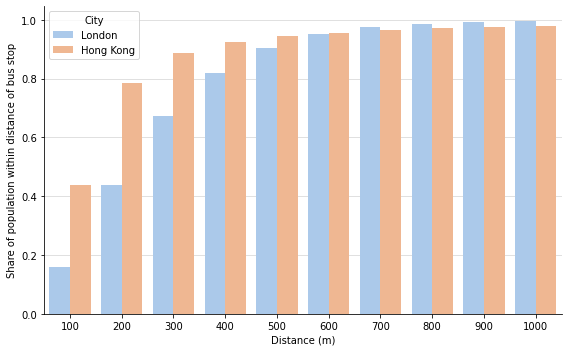

In [9]:
_, ax = plt.subplots(figsize=(8, 5))
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#D9D9D9', zorder=3)

sns.barplot(data=melted, x='distance', y='value', hue='City', palette='pastel', ax=ax)
#sns.move_legend(ax, 'upper right', bbox_to_anchor=(1.3, 1))

sns.despine()
plt.xlabel('Distance (m)')
plt.ylabel('Share of population within distance of bus stop')
plt.tight_layout()
plt.savefig('figures/pct_within.png')

In [10]:
l_dists_nstops = pd.read_csv('gen/l_dists_nstops.csv')
l_dists_nstops

,Unnamed: 0,distance,count
0,0,100,0
1,1,100,0
2,2,100,1
3,3,100,0
4,4,100,0
...,...,...,...
232465,232465,1000,18
232466,232466,1000,0
232467,232467,1000,17
232468,232468,1000,7


In [11]:
l_dists_nstops = l_dists_nstops[['distance', 'count']]

In [13]:
hk_dists_nstops = pd.read_csv('gen/hk_dists_nstops.csv')
hk_dists_nstops

,Unnamed: 0,distance,count
0,0,100,0
1,1,100,0
2,2,100,0
3,3,100,0
4,4,100,0
...,...,...,...
1099545,1099545,1000,0
1099546,1099546,1000,0
1099547,1099547,1000,0
1099548,1099548,1000,0


In [14]:
hk_dists_nstops = hk_dists_nstops[['distance', 'count']]

In [15]:
hk_dists_nstops['City'] = 'Hong Kong'

In [16]:
l_dists_nstops['City'] = 'London'

In [17]:
dists_nstops = pd.concat(
    [l_dists_nstops, hk_dists_nstops],
    ignore_index=True
)
dists_nstops

,distance,count,City
0,100,0,London
1,100,0,London
2,100,1,London
3,100,0,London
4,100,0,London
...,...,...,...
1332015,1000,0,Hong Kong
1332016,1000,0,Hong Kong
1332017,1000,0,Hong Kong
1332018,1000,0,Hong Kong


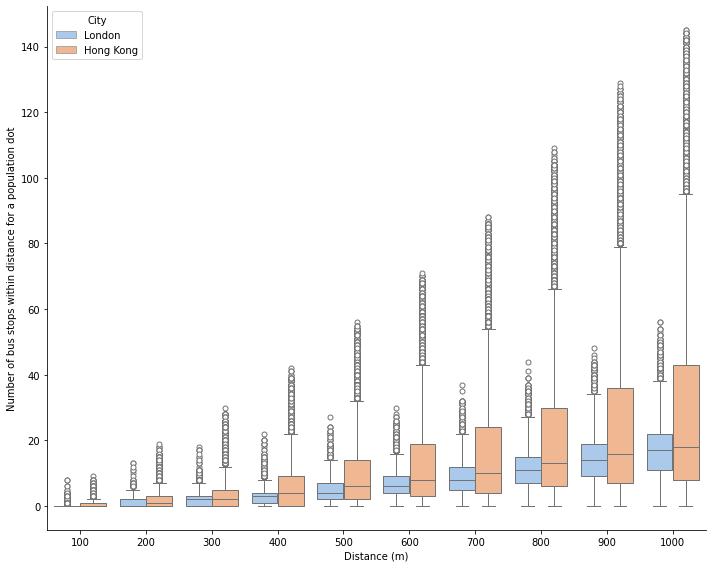

In [18]:
_, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=dists_nstops, y='count', x='distance', hue='City', ax=ax, palette='pastel', linewidth=1,
           flierprops=dict(markerfacecolor='white', marker='o'))
sns.despine()
plt.xlabel('Distance (m)')
plt.ylabel('Number of bus stops within distance for a population dot')
plt.tight_layout()
plt.savefig('figures/nstops_distribution.png')